#Aula 1 - Séries Temporais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

**Definições:**

*   **tendência:** evolução temporal (direção pra onde os dados estão indo)
*  **sazonalidade:** recorrência de oscilações da série
*   **resíduo:** o que sobra após remover tendência e sazonalidade


1.   **Séries estacionárias:** sinônimo de constante - média, variância e co-variância não mudam com o tempo
2.   **Séries não estacionárias:** média, variância e co-variância oscilam







In [1]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [4]:
df = pd.read_csv(df_path)

df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
#vamos colocar a data no index e usar o pd.to_datetime pra transformar de object em datetime:

df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

In [7]:
#dropar coluna date original q não vai precisar ser usado, já q colocamos a data no índice:
df.drop("DATE", inplace=True, axis=1)

In [8]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
#busca por index:

df.loc["1985-05-01"]

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

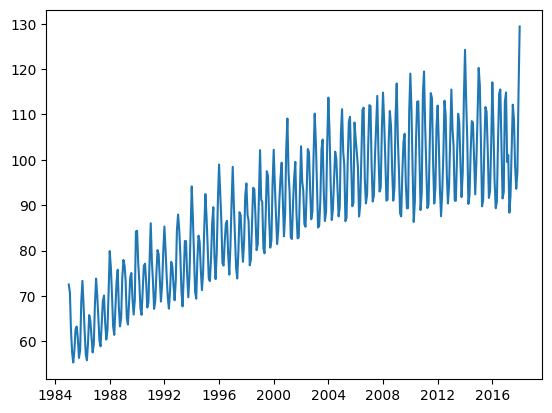

In [ ]:
#plotar as duas colunas:

plt.plot(df.index, df.Value)

**análise**: consumo aumentou, tendência de crescimento do consumo de energia

In [10]:
#decompor a série nos seus componentes - tendência, sazonalidade, resíduo
resultados = seasonal_decompose(df)

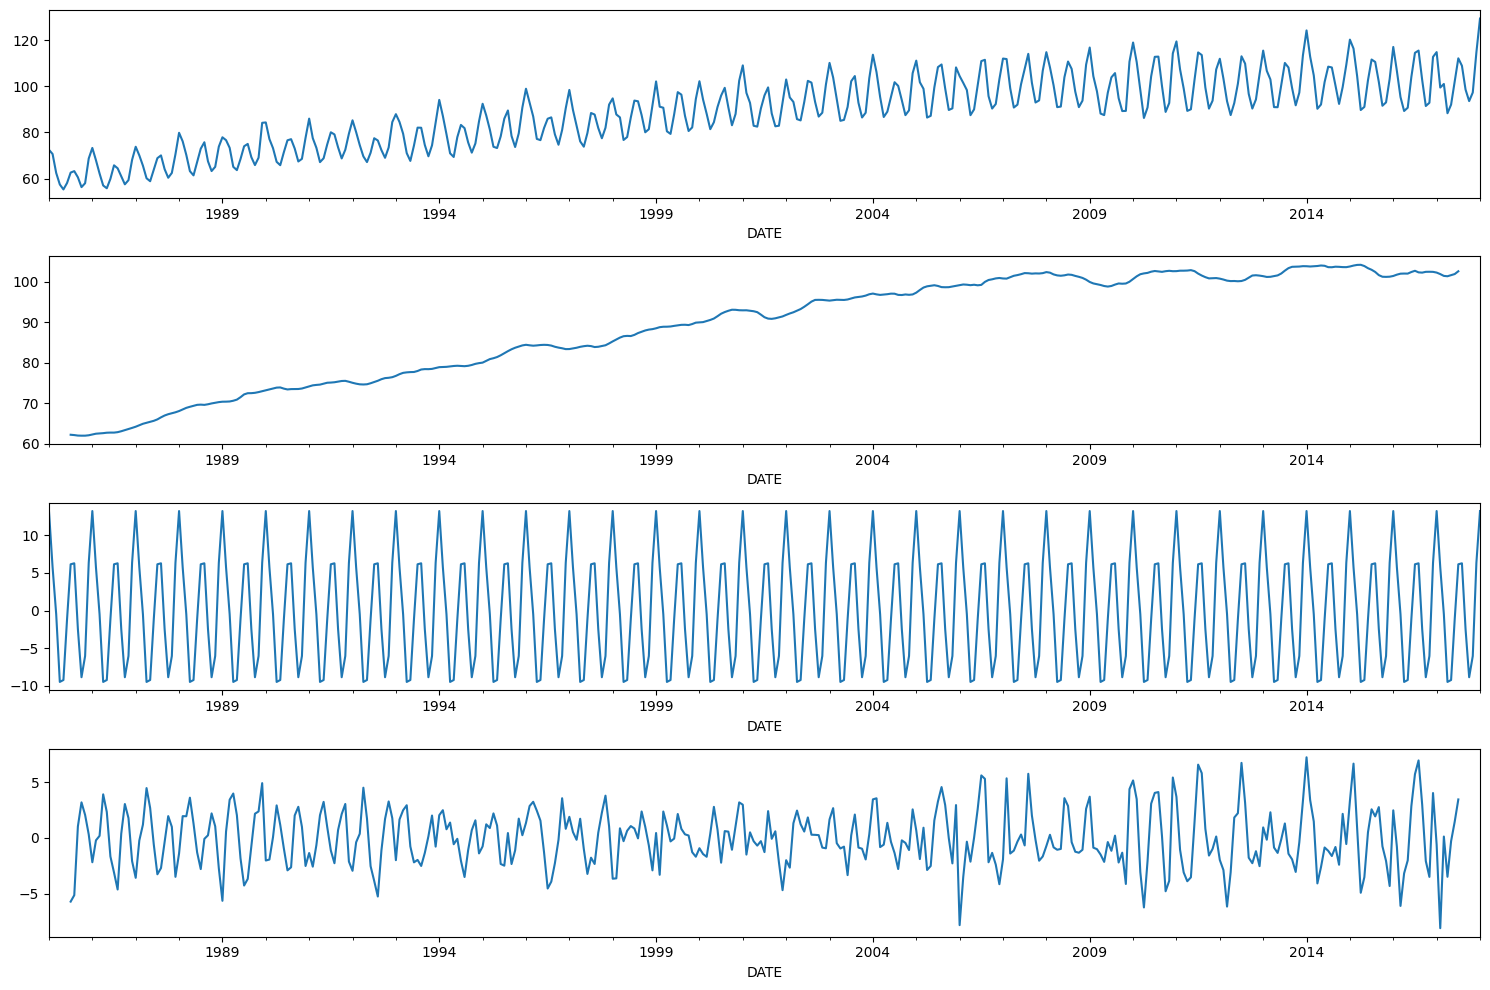

In [ ]:
#plotar a série nos seus componentes - tendência, sazonalidade, resíduo

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

**análise**: segundo gráfico é **tendência** (crescente), terceiro é **sazonalidade** (constante pq se repete sempre), quarto é **resíduo** (momentos sem padrão)

In [ ]:
#teste estatístico pra ver se a série é estacionária ou não
#teste ADF: Augmented Dickey-Fuller

#H0: hipótese nula (série não estacionária)
#H1: hipótese alternativa (série estacionária - rejeição da hipótese nula)

#pra rejeitar H0 e usar H1, o p-value precisa ser MENOR q algum valor de significância (q definimos de acord com a necessidade). Qto menor o p-value, mais evidências contra a hipótese hula se tem. O mais comum é 5%
#se p-value é 0.05 (5%), rejeitamos H0 com nível de confiança de 95%. Se p-value maior que isso, não rejeitamos H0

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#deixa gráfico com cinza atrás (gostei bastante)
sns.set_style('darkgrid')

In [ ]:
x = df.Value.values

In [ ]:
result = adfuller(x)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-value: {result[1]}")
print("Valores críticos: ")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.256990350047235
P-value: 0.1862146911658712
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


**análise**: p valor alto, valor do teste estatístico foi maior que os valores
críticos. **Nesse caso, a série não é estacionária**

In [ ]:
#pra transformar essa série NÃO ESTACIONÁRIA em ESTACIONÁRIA, podemos usar log e média (remover tendência)

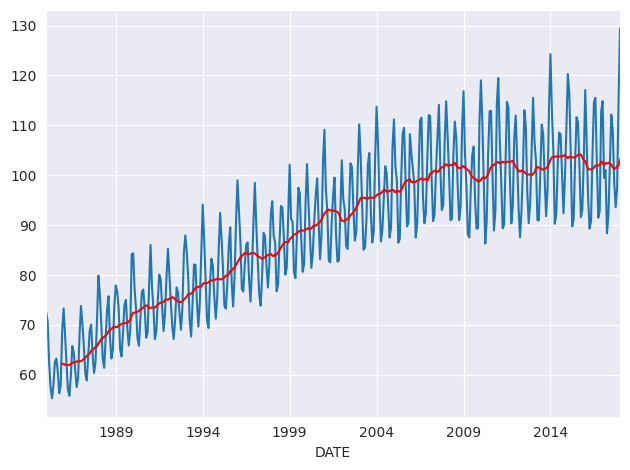

In [ ]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

**análise**: nesse gráfico vemos a tendência junto com a sazonalidade

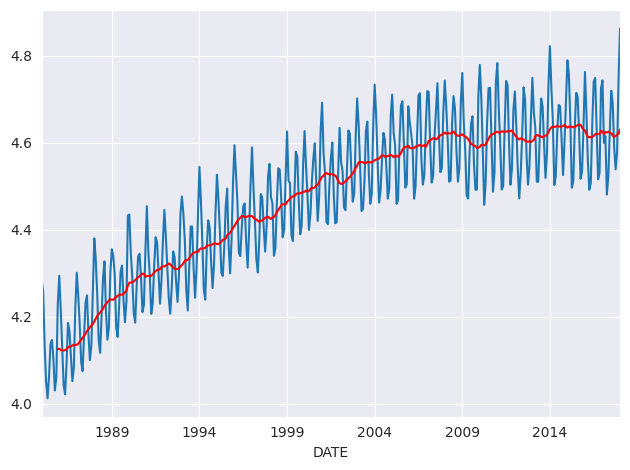

In [ ]:
#aqui estamos fazendo o msm gráfico de cima, porém usando log pra remover tendência e sazonalidade

df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

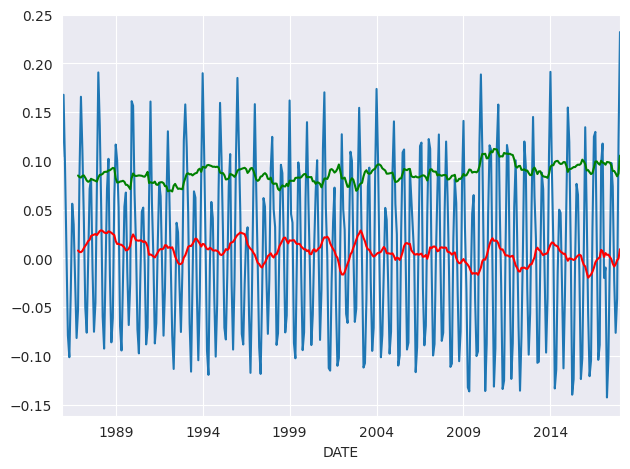

In [ ]:
#aqui estamos fazendo o msm gráfico, mas sem a média móvel:

df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

**análise**: oscilação pequena da média, gráfico parece mais constante

In [ ]:
X_s = df_s.Value.values

result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-value: {result_s[1]}")
print("Valores críticos: ")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -5.2115861853654355
P-value: 8.32563975994627e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


**análise**: p-value mto próximo de zero (logo, abaixo dos 5%) e teste estatístico menor que os valores críticos. Essa é uma série estacionária agora. **Usando log transformamos a série não estacionária em estacionária**. Obs: seria possível usar derivada pra transformá-la em cada vez mais estacionária, com P value tendendo a zero. É como se a linha vermelha do gráfico ficasse cada vez mais "esticada", com média móvel quase reta (e não móvel).

Teste ADF
Teste Estatístico: -7.651129568145172
P-value: 1.788126735435739e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


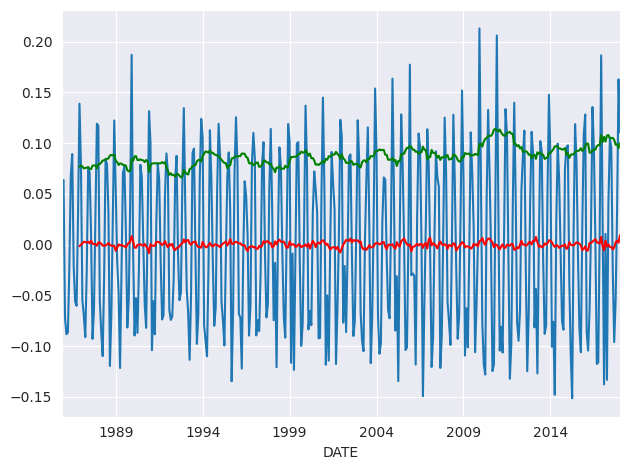

In [ ]:
#usando a diferenciação (derivada) pra transformar mais em estacionária:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


X_diff = df_diff.Value.dropna().values

result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-value: {result_diff[1]}")
print("Valores críticos: ")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

**análise**: usando diferenciação/derivada pra transformá-la em cada vez mais estacionária, com P value tendendo a zero. É como se a linha vermelha do gráfico ficasse cada vez mais "esticada", com média móvel quase reta (e não móvel).

#Aula 2 - Utilizando datas como índice

In [ ]:
#pra transformar a coluna de data em datetime já na leitura do df, usar df = pd.read_csv("x_csv", sep=",", parse_dates[0]). Pra usar index como coluna de data, usar index_col='DATE'
#essa é outra forma de fazer (fizemos diferente na aula 1)

In [ ]:
#vantagem de usar data como index, busca por data com loc: (além de deixar dataset mais enxuto, com uma coluna só)
df.loc["2000-05-01"]

Value    84.4552
Name: 2000-05-01 00:00:00, dtype: float64

#Aula 3 - Bibliotecas Fundamentais em Time Series Problem

**documentação Prophet**: biblioteca não mto comum, mas querida pelos cientistas de dados / previsão do comportamento futuro das séries temporais.

#Aula 4 - Análise exploratória de dados (ADA)

**Conceitos**:

**janela temporal**: janela de tempo dentro dos dados usados na previsão, ex: prever dados de clima com base nos últimos 10 dias (esses 10 dias são sua janela)

**interpolação vs extrapolação**: passar a reta em todos os pontos (regressão linear) vs prever futuro (séries temporais)  

**autocorrelação / autocorrelação parcial**: ACF / PACF. ACF = correlacionar uma variável na msm linha do tempo (pode ser direta e indireta). PACF = ACF direta (?)

**ARIMA**: modelo de previsão de séries temporais - AutoRegressivo, Integrado, Moving Average. Pra usar ARIMA, precisa de ACF e PACF

**média zerada**:

**ruído (white noise)**: coisas inesperadas da série, q fogem do padrão

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
#nlags: qto tempo eu quero prever pra frente. Cria pra ACF e PACF:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

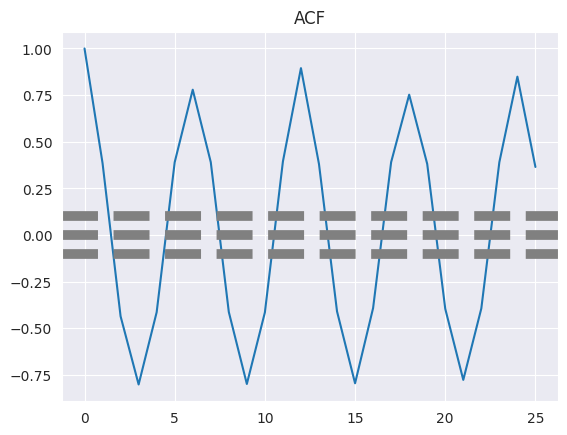

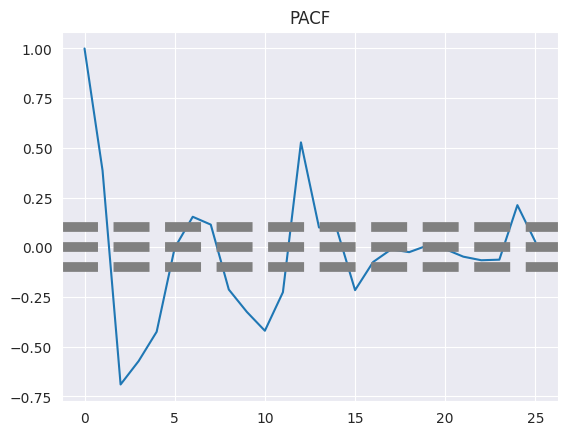

In [ ]:
#limite crítico 5% da ACF:
#1.96/sqrt(N-d) -> N é núm de pontos do df e d é num de vezes q nós diferenciamos o df (diff). Obs: esse 1.96 é aquele intervalo interquartil da estatística

plt.plot(lag_acf)

plt.axhline(y=-1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=0, linestyle="--", color="gray", linewidth=7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y=-1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=0/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.title("PACF")
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


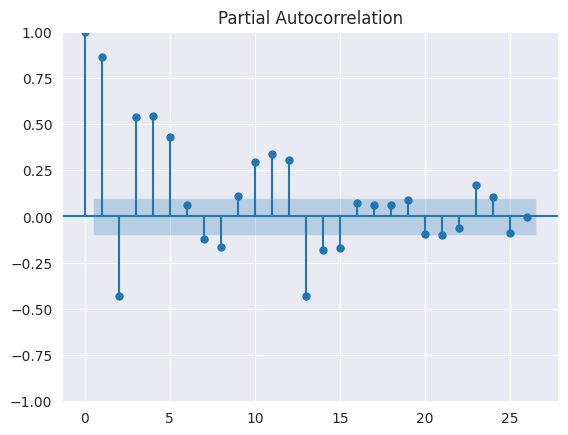

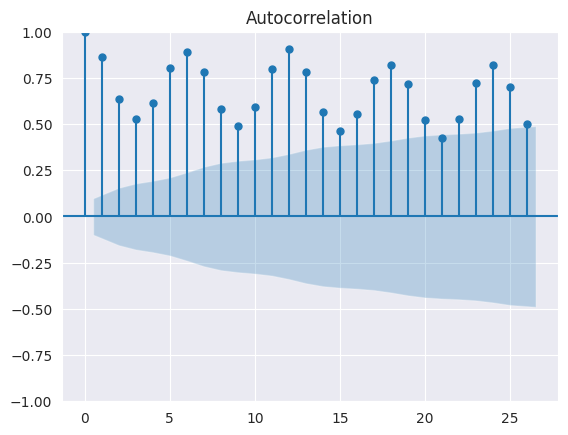

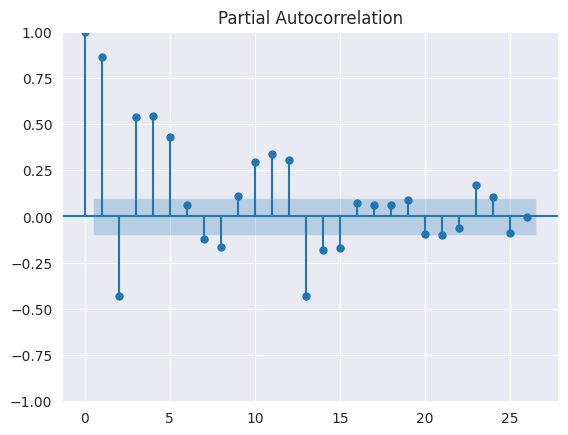

In [ ]:
#outra forma de plotar o ACF e o PACF com o stats models:

esses gráficos de ACF e PACF tem um desenho q lembra um pouco os outros gráficos de ACF que criamos.

#Aula 5 - Modelando e Realizando o Forecasting (falta dataset)

In [ ]:
df_novo = pd.read_csv('/content/train.csv', index_col='id', parse_dates=['date'])  #dataset de varejo (não achei ainda), com várias lojas

In [ ]:
df_novo['store_nbr'].nunique()  #selecionar somente 1 loja pra montar o modelo: pensando em várias filiais, às vezes o modelo pode não se aplicar bem a todas

In [ ]:
df_1 = df_novo.loc[df_novo['store_nbr'] == 1, ['date', 'family', 'sales']]  #selecionamos as colunas date, family e sales da loja com id = 1
df_1 = df_1.rename(columns={'date':'ds','sales':'y','family':'unique_id'})  #renomear colunas com nomes adequados pra usar nas bibliotecas (data = ds, coluna target = y)

In [ ]:
treino = df_1.loc[df_1['ds'] < '2014-01-01']    #pegar df_1, na coluna ds (data), menor que 2014, ou seja, 2013 inteiro pra treino - fazer filtro (loc)
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]   #pegar df_1, coluna ds(data), maior ou igual a jan/14 e menor que abr/14 - fazer filtro (loc)
h = valid['ds'].nunique() #variável h = horizonte, pra quanto tempo pra frente eu quero prever. Validação curta: qto maior o tempo de previsão, maior o erro (banda de previsão parece cone invertido).
#ao fazer essa fórmula pro h, vai pegar o mesmo período que usei pra validar o modelo (no caso, 3 meses)

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

#MAPE: erro percentual médio / WMAPE: erro percentual médio weighted. Essa função pega o valor absoluto do MAPE (sem negativo). Métrica de validação do modelo


In [ ]:
!pip install statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [ ]:
#como escolher o modelo: pensar em qual a solução mais simples em uma série temporal?
#Nesse caso, é prever o futuro com base no valor do último período conhecido (baseline).(modelo Naive) Ele pega o valor do último período da base de treino e usa pra prever o futuro.


In [ ]:
#SOLUÇÃO 1:
#solução usando o último dia do período de treino pra prever o período de teste
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)  #criar a classe model. Usar models como "naive" (modelo escolhido), frequência de medição (diária), n_jobs=número de CPUs/núcleos do processador usadas (-1 significa usar todas as CPUs)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])  #predição: variável h (horizonte), level: nível de predição (nesse caso 90%)
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left') #fazer merge da tabela de dados preditos com dados de validação. Equivalente ao left join (queremos ver o modelo com base na tabela da esquerda e o que é comum com a tabela da direita)

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values) #pegar os valores da coluna y (verdadeiro) e os valores do Naive (predito)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90) #plotar o gráfico


In [ ]:
#resposta: o wmape deu 57.5% - é um erro mto alto
##### INTERPRETAÇÃO DO GRÁFICO ####
#forma um gráfico de cone. A gente só acerta a base do cone, mas a parte mais aberta não conseguimos prever
#No dataset tb tem duas colunas de largura de banda (naive 90)
#a predição dá uma reta (Naive), ou seja, o modelo só olha o último valor e pode entender q esse valor vai se manter igual pra tudo
#o problema pode vir não somente de trabalhar com um baseline, mas tb de ignorar a sazonalidade dos dados.
#VIMOS QUE NÃO DÁ PRA USAR SÓ O BASELINE PRA TRABALHAR, PQ O ERRO FOI MTO ALTO

In [ ]:
forecast_df

In [ ]:
#SOLUÇÃO 2:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), porém considerando a sazonalidade
#pra isso, usamos o modelo SeasonalNaive, usando os dados de 1 semana pra prever
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
#resposta: wmape = 50,91% - diminuiu o erro
##### INTERPRETAÇÃO DO GRÁFICO ####
#conseguimos observar a sazonalidade na previsão e no modelo tb
#pra melhorar o modelo, podemos adicionar a média móvel tb

In [ ]:
forecast_dfs

In [ ]:
#SOLUÇÃO 3:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), considerando a sazonalidade e a média móvel (window_size)
#pra isso, usamos o modelo SeasonalWindowAverage, usando os dados de 1 semana pra prever e média das últimas 2 semanas
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
#resposta: wmape = 53,02%
##### INTERPRETAÇÃO DO GRÁFICO ####
#conseguimos observar a sazonalidade na previsão e no modelo tb
#parece q ele segue bem o padrão, mas ainda está errando mais. Não tem cone pq não é mto útil pra esse tipo de modelo

In [ ]:
#SOLUÇÃO 4:
#ARIMA
#AR: Modelo autoregressivo (olha para as vendas do passado e acha uma correlação futura)
#I: Integrado (quantidade que a série foi diferenciada) - ele tenta transformar a série estacionária em não estacionária (como fizemos na outra aula), e faz uma quantidade de diffs pra isso. Esse I é a qtde de diffs.
#MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
#resposta: wmape = 51,02%
##### INTERPRETAÇÃO DO GRÁFICO ####
#conseguimos observar a sazonalidade na previsão e no modelo tb
#ele foi em erro ainda maior que o modelo Naive, mas o cone diminuiu mto e tá mais ajustado aos dados em si - banda de confiança ficou mais dentro do padrão
#pra pegar valores maiores (picos), podemos tentar aumentar o intervalo de confiança
#arima não consegue entender picos mais altos de variação, pq ele tem um limite de número de diffs

In [ ]:
#OBS:
#treinando vários modelos ao msm tempo
#não dá pra usar exatamente esse código pq teria q criar os outros wmapes e plots, mas aqui ele manteve só pra curiosidade:

model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive()], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)